# Humic Acid LOD Testing in Water - High Temp Dissolution
Created by Hans Gaensbauer for the MIT Climate and Sustainability Consortium </br>3-6-2023

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from NMR import JEOL_parser as jeol

In [2]:
initial_concentration = 1

ns = 1
cutoff = 19
dlen = 39328
data = np.zeros((ns, dlen), dtype = np.complex128)
zero_point = 0
base_freq = 0

folder = "../data/nmr_data/"

for i in range(ns):
    filename = (folder + "HA-H2O-HOT_CARBON-2-1.jdf")
    data[i] = jeol.get_1d_data(filename)

zero_point = jeol.get_header(filename)["Zero_Point"][0]
base_freq = jeol.get_header(filename)["Base_Freq"][0]
    
t = jeol.get_ruler(filename)

<IPython.core.display.Javascript object>


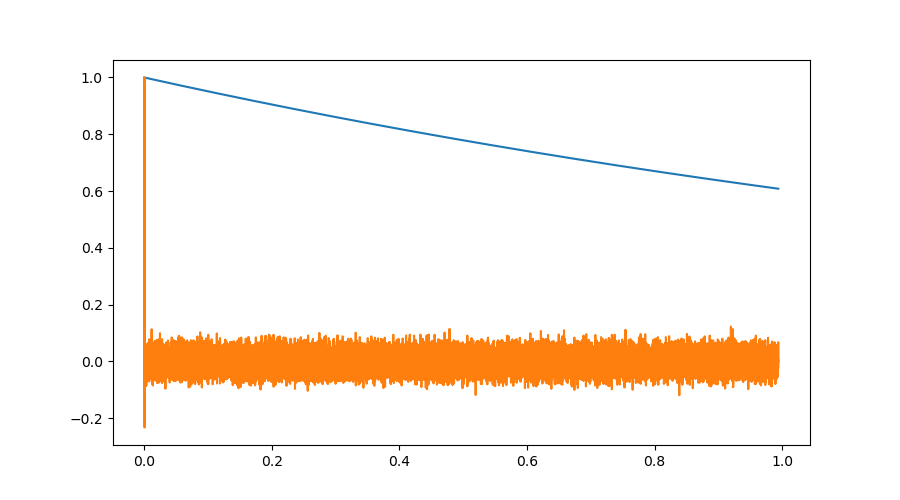

In [8]:
#Set the spectral width
sexp = np.exp(-0.5*(t-t[0]))

#plot the exponential with one of the FIDs
sexp_plot = plt.figure(figsize=(9,5))
plt.plot(t, sexp)
plt.plot(t, np.real(data[0])/np.real(data[0]).max())

<IPython.core.display.Javascript object>


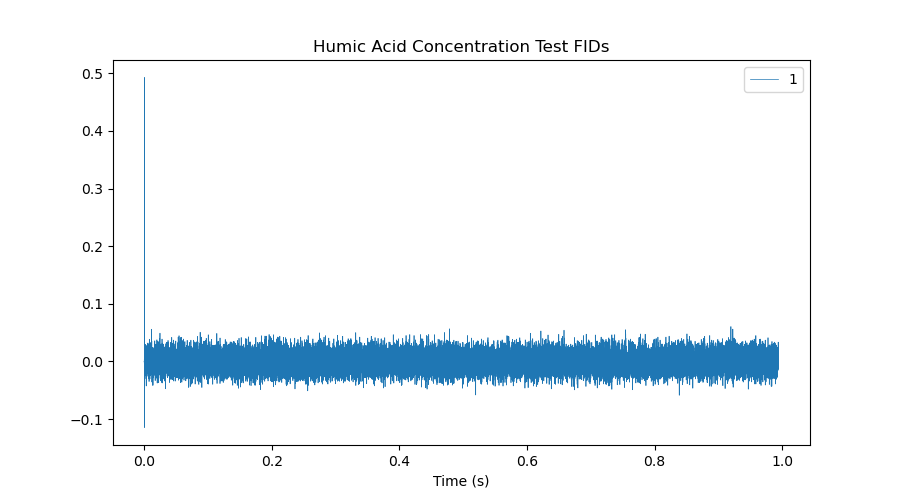

In [9]:
#plim = 128

#plot the FIDs
fid_plot = plt.figure(figsize=(9,5))
for i in range(ns):
    plt.plot(t[:], np.real(data[(ns-1-i)][:]), linewidth=0.5)
    
plt.legend([("%d" % (i+1)) for i in range(ns)])
#plt.ylim([0.1, -0.1])
plt.title("Humic Acid Concentration Test FIDs")
plt.xlabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


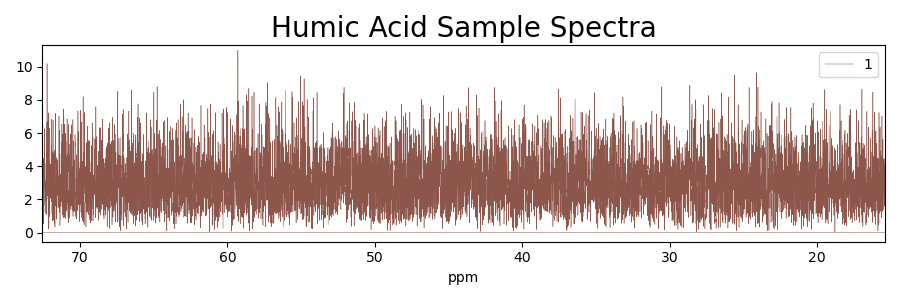

In [10]:
spectra = np.zeros((ns, dlen), dtype = np.complex128)
ppm = np.zeros((ns, dlen))

#Create Spectra
for i in range(ns):
    spectra[i] = np.fft.fft(data[i] * sexp)
    ppm[i] = (zero_point/(t[1]-t[0]) - np.fft.fftfreq(len(data[i]), t[1]-t[0]))/base_freq #Convert to ppm

spec_plot = plt.figure(figsize=(9,3))
for i in range(ns):
    plt.plot(ppm[(ns-1-i)], np.abs(spectra[(ns-1-i)]), linewidth=0.35, color='tab:brown')
    
plt.legend([("%d" % (i+1)) for i in range(ns)])
plt.gca().invert_xaxis()
plt.title("Humic Acid Sample Spectra", fontsize = 20)
plt.xlabel("ppm")

plt.tight_layout()
plt.show()

In [6]:
#integrate
pwr = np.sum(np.abs(np.multiply(spectra, spectra)), 1)
np.shape(pwr)

(1,)

<IPython.core.display.Javascript object>


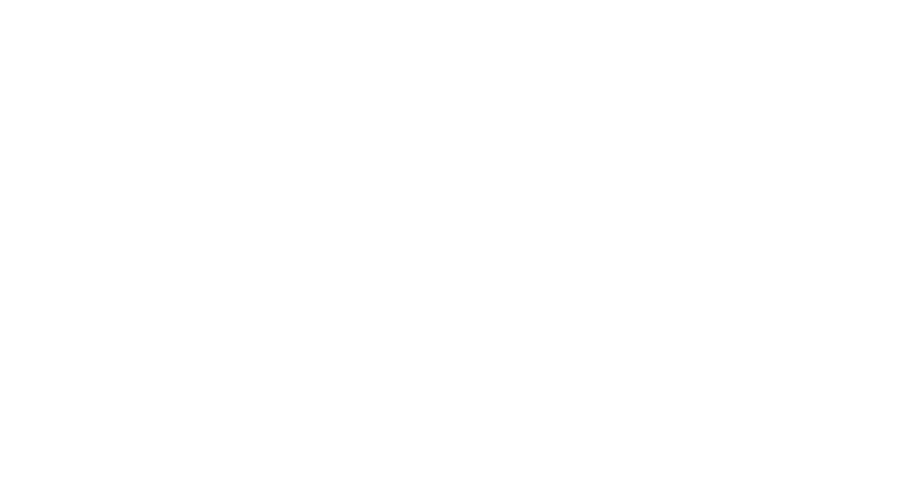

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

In [7]:
pwrfig = plt.figure(figsize=(9,5))
plt.plot(range(1,3), pwr)
plt.show()